In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering

In [2]:
# data set
book = pd.read_csv('books.csv', error_bad_lines=False)
book

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


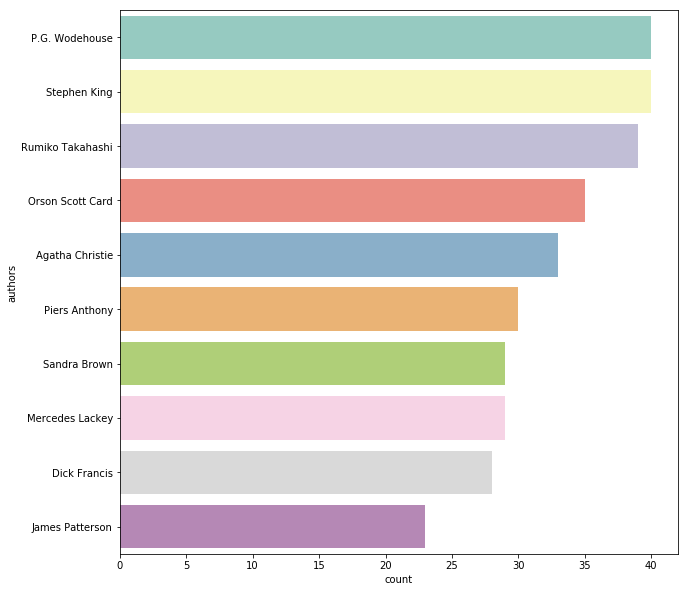

In [3]:
# 10 Authors with more books
plt.figure(figsize=(10,10))
plot = sns.countplot(y = "authors", data = book, order = book['authors'].value_counts().iloc[:10].index, palette = "Set3")

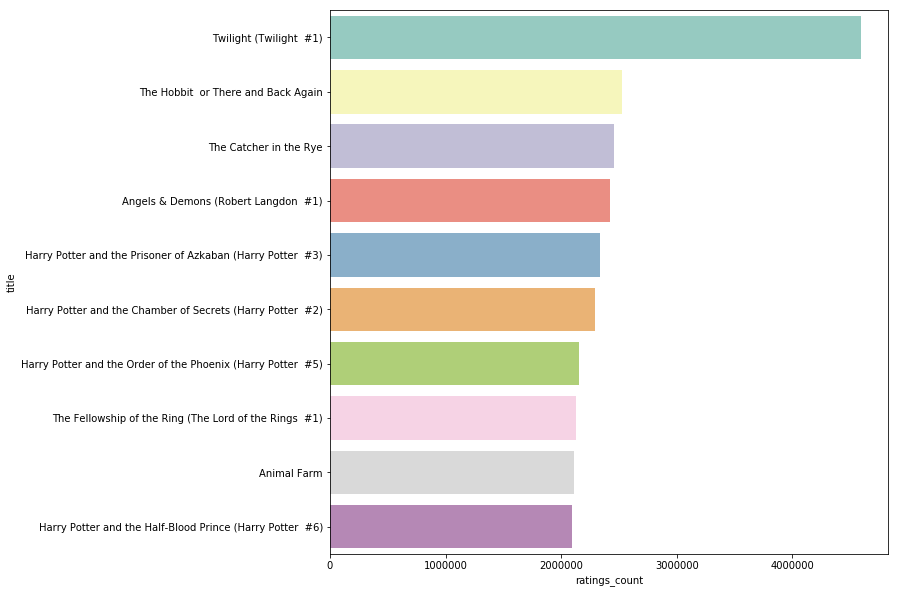

In [4]:
# Top 10 most rated books
most_rated = book.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(10,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='Set3')

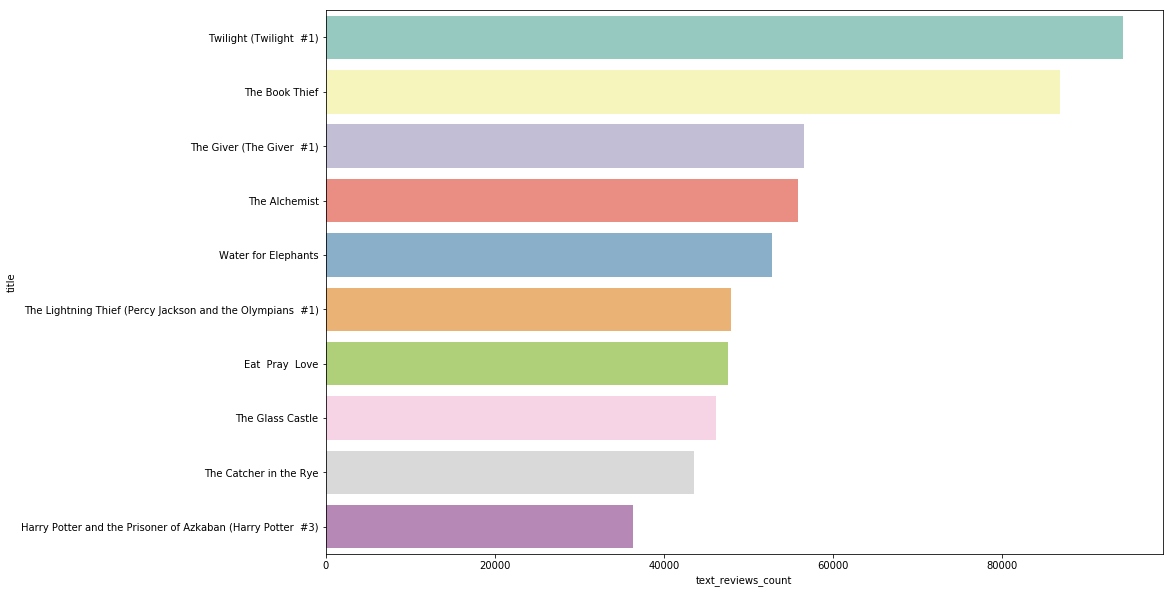

In [5]:
# Top 10 books with more written text reviews
most_rated = book.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['text_reviews_count'], most_rated.index, palette='Set3')

C:\Users\Aidos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x720 with 0 Axes>

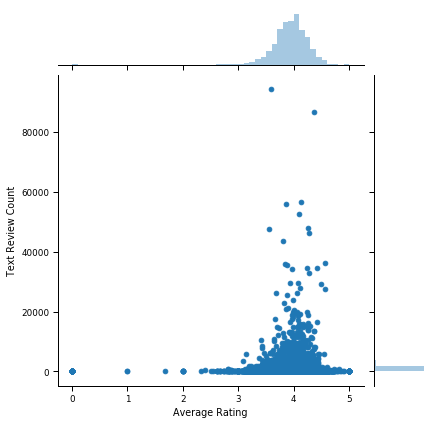

In [6]:
# Relationship between Rating and Text Reviews
plt.figure(figsize=(15,10))
book.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data=book[['text_reviews_count', 'average_rating']])
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()

In [7]:
# data set for clustering
df = book[['bookID','average_rating','  num_pages']]
# rename column 
df.rename(columns={'  num_pages':"num_pages"}, inplace=True)

C:\Users\Aidos\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [8]:
df.head()

,bookID,average_rating,num_pages
0,1,4.57,652
1,2,4.49,870
2,4,4.42,352
3,5,4.56,435
4,8,4.78,2690


---
### Preprocessing column (num_pages)

In [9]:
from sklearn.preprocessing import normalize

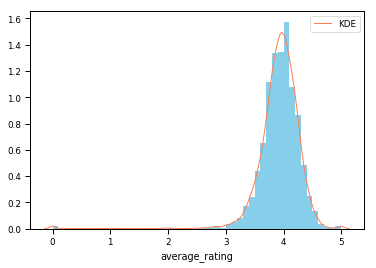

In [10]:
# Average rating distribution
sns.distplot(df['average_rating'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 1, "alpha": 1, "color": "skyblue"});

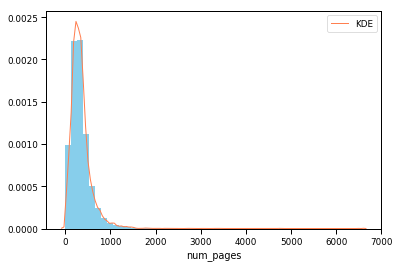

In [11]:
# Number of pages distribution
sns.distplot(df['num_pages'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 1, "alpha": 1, "color": "skyblue"});

<Figure size 1080x720 with 0 Axes>

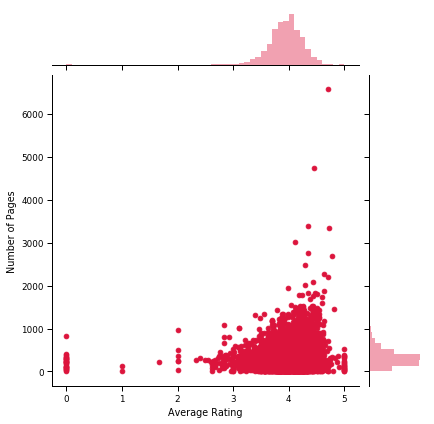

In [12]:
# Relationship between Rating and Number of pages
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [13]:
data_scaled = normalize(df[['bookID','num_pages']])
data_scaled = pd.DataFrame(data_scaled, columns=['bookID','num_pages'])
data_scaled.head()

,bookID,num_pages
0,0.001534,0.999999
1,0.002299,0.999997
2,0.011363,0.999935
3,0.011493,0.999934
4,0.002974,0.999996


In [14]:
df['norm_num_pages'] = data_scaled.num_pages

C:\Users\Aidos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.head()

,bookID,average_rating,num_pages,norm_num_pages
0,1,4.57,652,0.999999
1,2,4.49,870,0.999997
2,4,4.42,352,0.999935
3,5,4.56,435,0.999934
4,8,4.78,2690,0.999996


In [16]:
# drop unnormalized column
df = df.drop(['num_pages'], axis = 1) 

In [17]:
df.head()

,bookID,average_rating,norm_num_pages
0,1,4.57,0.999999
1,2,4.49,0.999997
2,4,4.42,0.999935
3,5,4.56,0.999934
4,8,4.78,0.999996


--- 
### Dendogram



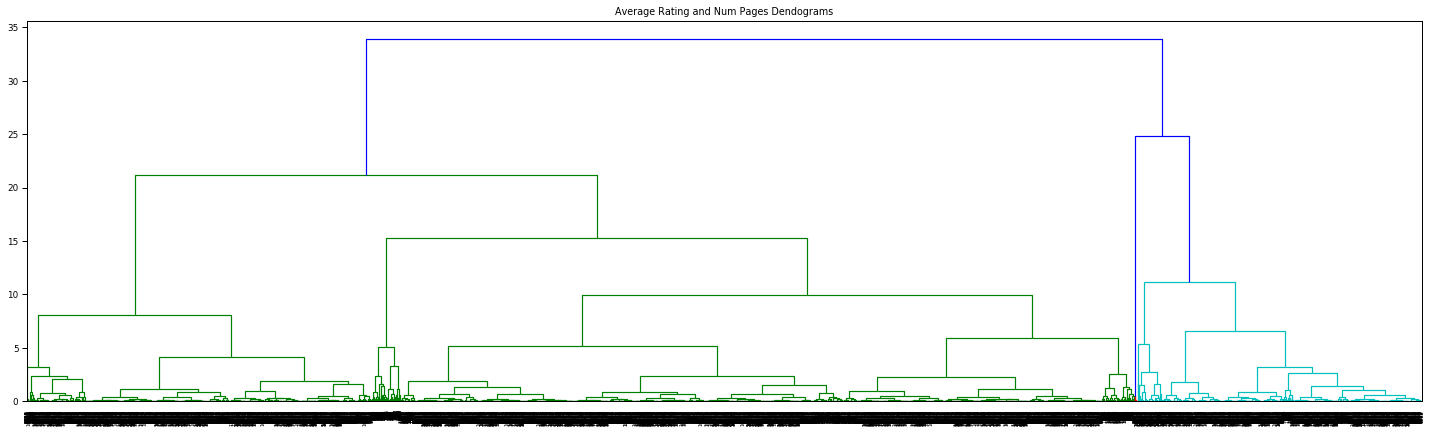

In [18]:
df1 = df.loc[:, ['average_rating', 'norm_num_pages']]
plt.figure(figsize=(25, 7))
plt.title("Average Rating and Num Pages Dendograms")
dend = shc.dendrogram(shc.linkage(df1, method='ward'))

In [19]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(df1)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

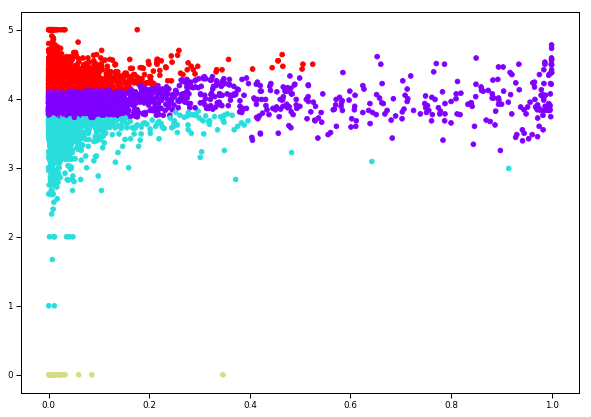

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(df1.iloc[:,1], df1.iloc[:,0], c=cluster.labels_, cmap='rainbow')